In [13]:
import matplotlib.pyplot as plt
import numpy as np
import random
from queue import Queue

# dim must be even
def create_maze(dim):
    # Create a grid filled with walls
    maze = np.ones((dim, dim))

    # Define the starting point
    x, y = (0, 0)
    maze[2*x+1, 2*y+1] = 0

    # Initialize the stack with the starting point
    stack = [(x, y)]
    while len(stack) > 0:
        x, y = stack[-1]

        # Define possible directions
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        random.shuffle(directions)

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if nx >= 0 and ny >= 0 and nx < (dim-2)/2 and ny < (dim-2)/2 and maze[2*nx+1, 2*ny+1] == 1:
                maze[2*nx+1, 2*ny+1] = 0
                maze[2*x+1+dx, 2*y+1+dy] = 0
                stack.append((nx, ny))
                break
        else:
            stack.pop()
            
    # Create an entrance and an exit
    maze[1, 0] = 0
    maze[-3, -2] = 0

    return maze

# plotting functions
def plot(maze):
    # add 0.5 so that the state is plotted in the middle of the grid square

    plt.figure(figsize=(5,5))
    plt.imshow(maze.T, origin="lower", cmap='gray') # plot the occupancy map
    plt.axis('off')
    plt.show()

def free_state_search(maze):
    while True:
        x0 = np.random.randint(maze.shape[0])
        y0 = np.random.randint(maze.shape[1])
        #if the location is not an obstacle, is not the goal, then break
        obs = maze[x0,y0]
        if (obs == 0):
            break
    return np.array([x0,y0])

40


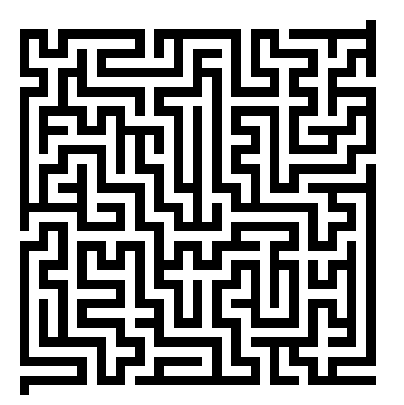

In [14]:
maze_size = 40
maze = create_maze(maze_size)
print(len(maze))
plot(maze)

In [15]:
goal = free_state_search(maze)
print(f"The x, y coordinates of the goal is: ({goal[0]},{goal[1]})") 

The x, y coordinates of the goal is: (31,30)


In [16]:
# save the trajectory into a file
import pickle
import os
# find the next available file path
def get_next_filename(base_name, extension):
    index = 1
    while True:
        filename = f"{base_name}_{index}.{extension}"
        if not os.path.exists(filename):
            return filename
        index += 1

filename = get_next_filename("mazes/maze_procedural", "png")



In [17]:
from PIL import Image

# mark the goal as a 0.5
maze[goal[0], goal[1]] = 0.5
# save the maze as a png 
maze = np.rot90(maze, axes = (0, 1))
# make 1 be black, 0 be white. Black - low intensity in png, is represented with a 0. where as white is represetned with 255. 
maze = 1 - maze

# turn the maze into a png, with goal as a red dot
def binary_array_to_image(binary_array):
    # Create a 3-channel image with the same shape as the binary array
    height, width = binary_array.shape
    image = np.zeros((height, width, 3), dtype=np.uint8)

    # Convert 0s to black and 1s to white
    image[binary_array == 0] = [0, 0, 0]  # Black
    image[binary_array == 1] = [255, 255, 255]  # White
    image[binary_array == 0.5] = [255, 0, 0]  # Red

    # Create a Pillow Image object
    image_pil = Image.fromarray(image)

    return image_pil

# Convert the binary array to a 3-channel image
result_image = binary_array_to_image(maze)
# Or save it to a file
result_image.save(filename)

In [18]:
# extract the location of the goal
def find_goal_location(image_path):
    # Open the image
    img = plt.imread(image_path)

    # Get the width and height of the image
    height, width, channels = img.shape

    # Iterate through each pixel to find the red pixel
    for x in range(height):
        for y in range(width):
            # Get the RGB values of the pixel
            rgb = img[x, y]
            r = rgb[0]
            g = rgb[1]
            b = rgb[2]
            # Check if it's a red pixel (adjust the threshold based on your image)
            if r > 0.7 and g < 0.3 and b < 0.3:
                return (y, height - 1 - x)
            
goal_tuple = find_goal_location(filename)
print(f"The x, y coordinates of the goal is: ({goal_tuple[0]},{goal_tuple[1]})")

The x, y coordinates of the goal is: (31,30)
